# ch2. tensorflow basics

# 2.0 import tensorflow module

In [1]:
import tensorflow as tf
import numpy as np 

print(tf.__version__)

ModuleNotFoundError: No module named 'tensorflow'

# 2.1 tensor

In [ ]:
# https://www.tensorflow.org/guide/tensor

# Tensors are multi-dimensional arrays with a uniform type (called a dtype)
# If you're familiar with NumPy, tensors are (kind of) like np.arrays.

# All tensors are immutable like Python numbers and strings: 
# you can never update the contents of a tensor, only create a new one.

## 2.11 tf.constant

In [ ]:

tensor_constant = tf.constant(1)

print('tensor_constant - type', type(tensor_constant))
print('tensor_constant', tensor_constant)
print('tensor_constant.shape', tensor_constant.shape)
print('tensor_constant.dtype', tensor_constant.dtype)

# https://www.tensorflow.org/api_docs/python/tf/constant

# Creates a constant tensor from a tensor-like object.
# If the argument dtype is not specified, then the type is inferred from the type of value.

t3 = tf.constant([1, 2, 3, 4, 5, 6])
print('t3 size', tf.size(t3))
print('t3 shape', tf.shape(t3))

print('t3.shape', t3.shape)
print('t3.dtype', t3.dtype)

# If dtype is specified, the resulting tensor values are cast to the requested dtype.
# https://www.tensorflow.org/api_docs/python/tf/dtypes

t31 = tf.constant([1, 2, 3, 4, 5, 6], dtype=tf.float64)
print('t31 size', tf.size(t31, out_type=tf.float64))
print('t31 shape', tf.shape(t31))

# If shape is set, the value is reshaped to match. 
# Scalars are expanded to fill the shape:

# A "matrix" or "rank-2" tensor has two axes:
t32 = tf.constant([1, 2, 3, 4, 5, 6], shape=(2, 3))
print('t32', t32)



## 2.12 shapes

Tensors have shapes. Some vocabulary:

* **Shape**: The length (number of elements) of each of the axes of a tensor.
* **Rank**: Number of tensor axes. A scalar has rank 0, a vector has rank 1, a matrix is rank 2.
* **Axis** or Dimension: A particular dimension of a tensor.
* **Size**: The total number of items in the tensor, the product of the shape vector's elements.

In [ ]:

# Here is a "scalar" or "rank-0" tensor . 
# A scalar contains a single value, and no "axes".

rank_0_tensor = tf.constant(4)
print('rank_0_tensor', rank_0_tensor, '\n')

# A "vector" or "rank-1" tensor is like a list of values. A vector has one axis:
rank_1_tensor = tf.constant([2.0, 3.0, 4.0])
print('rank_1_tensor', rank_1_tensor, '\n')

# Tensors may have more axes; here is a tensor with three axes:
rank_3_tensor = tf.constant([
  [[0, 1, 2, 3, 4],
   [5, 6, 7, 8, 9]],
  [[10, 11, 12, 13, 14],
   [15, 16, 17, 18, 19]],
  [[20, 21, 22, 23, 24],
   [25, 26, 27, 28, 29]],])
print('rank_3_tensor', rank_3_tensor, '\n')

# Typical axis order

# While axes are often referred to by their indices, 
# you should always keep track of the meaning of each. 
# Often axes are ordered from global to local: 

# The batch axis first, followed by spatial dimensions, and features for each location last. 
# This way feature vectors are contiguous regions of memory.

rank_4_tensor = tf.zeros([3, 2, 4, 5])
print('rank_4_tensor', rank_4_tensor, '\n')


<img src="https://drive.google.com/uc?id=1RIqj-vWJSGyzg307OtrBBgi2hmo8fF6T" width="800"/>

<img src="https://drive.google.com/uc?id=1Vt0juPT0qj-dKw667NXdrQ_lKXJp7chd" width="800"/>

<img src="https://drive.google.com/uc?id=1gQQkRY1gYnd3OFQfr0ghd3U8qNLnsOSM" width="800"/>

## 2.13 Slicing

TensorFlow follows standard Python indexing rules, similar to indexing a list or a string in Python, and the basic rules for NumPy indexing.

* indexes start at 0
* negative indices count backwards from the end
* colons, :, are used for slices: start:stop:step

In [ ]:
rank_1_tensor = tf.constant([0, 1, 1, 2, 3, 5, 8, 13, 21, 34])
print(rank_1_tensor.numpy())
print("First:", rank_1_tensor[0].numpy())
print("Second:", rank_1_tensor[1].numpy())
print("Last:", rank_1_tensor[-1].numpy())

print("Everything:", rank_1_tensor[:].numpy())
print("Before 4:", rank_1_tensor[:4].numpy())
print("From 4 to the end:", rank_1_tensor[4:].numpy())
print("From 2, before 7:", rank_1_tensor[2:7].numpy())
print("Every other item:", rank_1_tensor[::2].numpy())
print("Reversed:", rank_1_tensor[::-1].numpy())

rank_2_tensor = tf.constant([1, 2, 3, 4, 5, 6], shape=(3,2), dtype=tf.dtypes.float32)
print(rank_2_tensor.numpy())

print(rank_2_tensor[1, 1].numpy())
print("Second row:", rank_2_tensor[1, :].numpy())
print("Second column:", rank_2_tensor[:, 1].numpy())
print("Last row:", rank_2_tensor[-1, :].numpy())
print("First item in last column:", rank_2_tensor[0, -1].numpy())
print("Skip the first row:")
print(rank_2_tensor[1:, :].numpy(), "\n")

rank_3_tensor = tf.constant([
  [[0, 1, 2, 3, 4],
   [5, 6, 7, 8, 9]],
  [[10, 11, 12, 13, 14],
   [15, 16, 17, 18, 19]],
  [[20, 21, 22, 23, 24],
   [25, 26, 27, 28, 29]],])
print(rank_3_tensor)
print(rank_3_tensor[:, :, 4])

# 2.2 tf.Variable

* Variables are created and tracked via the tf.Variable class. 
* **A tf.Variable represents a tensor whose value can be changed by running ops on it.**
* Specific ops allow you to read and modify the values of this tensor. 
* Higher level libraries like tf.keras use tf.Variable to store model parameters.

In [ ]:

# https://www.tensorflow.org/api_docs/python/tf/Variable
# https://www.tensorflow.org/guide/variable

my_variable = tf.Variable(2)
print('my_variable', my_variable, '\n')
print('my_variable.type', type(my_variable), '\n')
print('my_variable.shape', my_variable.shape, '\n')
print('my_variable.dtype', my_variable.dtype, '\n')

# A variable looks and acts like a tensor, and, in fact, is a data structure backed by a tf.Tensor. 
# Like tensors, they have a dtype and a shape, and can be exported to NumPy.
my_tensor = tf.constant([[1.0, 2.0], [3.0, 4.0]])
my_variable = tf.Variable(my_tensor)
print('my_variable', my_variable, '\n')
print("my_variable.shape: ", my_variable.shape, '\n')
print("my_variable.dtype: ", my_variable.dtype, '\n')
print("my_variable.numpy: ", my_variable.numpy(), '\n')


# tensor operators
tv1 = tf.Variable([1,2,3])
tv2 = tf.Variable([1,1,1])
r1 = tv1 + tv2
print('r1 = tv1 + tv2', type(r1), r1)

tc1 = tf.constant([1,2,3])
tc2 = tf.constant([1,1,1])
r2 = tc1 + tc2
print('r2 = tc1 + tc2', type(r2), r2)

tc = tf.constant([1,2,3])
tv = tf.Variable([1,1,1])
r3 = tc + tv
print('r3 = tc + tv', type(r3), r3)

tv = tf.Variable([1,2,3])
tc = tf.constant([1,1,1])
r4 = tv + tc
print('r4 = tv + tc', type(r4), r4)


In [ ]:
# Most tensor operations work on variables as expected, 
# although variables cannot be reshaped.

print("Viewed as a tensor:", tf.convert_to_tensor(my_variable), '\n')
print("Index of highest value:", tf.math.argmax(my_variable), '\n')

# This creates a new tensor; it does not reshape the variable.
print("Copying and reshaping: ", tf.reshape(my_variable, [1,4]), '\n')
print('my_variable', my_variable, '\n')

# As noted above, variables are backed by tensors. 
# You can reassign the tensor using tf.Variable.assign. 
# Calling assign does not (usually) allocate a new tensor;
# instead, the existing tensor's memory is reused.

a = tf.Variable([2.0, 3.0])
print('a variable', a, '\n')
# This will keep the same dtype, float32
a.assign([1, 2]) 
print('a.assign([1, 2])', a, '\n')
# Not allowed as it resizes the variable: 
try:
  a.assign([1.0, 2.0, 3.0])
except Exception as e:
  print(f"{type(e).__name__}: {e}")


# If you use a variable like a tensor in operations, 
# you will usually operate on the backing tensor.

# Creating new variables from existing variables duplicates the backing tensors. 
# Two variables will not share the same memory.

a = tf.Variable([2.0, 3.0])
# Create b based on the value of a
b = tf.Variable(a)
a.assign([5, 6])

# a and b are different
print('a.numpy()', a.numpy(), '\n')
print('b.numpy()', b.numpy(), '\n')

# There are other versions of assign
print('a.assign_add([2,3])', a.assign_add([2,3]).numpy(), '\n')  # [7. 9.]
print('a.assign_sub([7,9])', a.assign_sub([7,9]).numpy(), '\n')  # [0. 0.]


# In Python-based TensorFlow, tf.Variable instance have the same lifecycle as other Python objects. 
# When there are no references to a variable it is automatically deallocated.

# Variables can also be named which can help you track and debug them. 
# You can give two variables the same name.

# Create a and b; they will have the same name but will be backed by
# different tensors.
a = tf.Variable(my_tensor, name="Mark")
# A new variable with the same name, but different value
# Note that the scalar add is broadcast
b = tf.Variable(my_tensor + 1, name="Mark")

# These are elementwise-unequal, despite having the same name
print(a == b)

# v = tf.Variable([0.0])
# with tf.GradientTape() as g:
#     loss = tf.constant(v + v)
# g.gradient(loss, v).numpy()

# print('gradient', g.gradient)
# print('watched_variables', g.watched_variables)

# 2.3 convert python objects to tensors

Most ops, like tf.matmul and tf.reshape take arguments of class tf.Tensor. 

However, you'll notice in the above case, Python objects shaped like tensors are accepted.

**Most, but not all, ops call convert_to_tensor on non-tensor arguments.** 

There is a registry of conversions, and **most object classes like NumPy's ndarray, TensorShape, Python lists, and tf.Variable will all convert automatically.**

In [ ]:
# numpy array to tensor

np_data = np.array([[1,2], [3,4]])
constant_from_narray = tf.constant(np_data, dtype=tf.dtypes.int32)
print('constant_from_numpy_array', type(constant_from_narray), constant_from_narray)
variable_from_narray = tf.Variable(np_data, dtype=tf.dtypes.int32)
print('variable_from_numpy_array', type(variable_from_narray), variable_from_narray)

# python list to tensor
data = [1,2,3]
constant_from_list = tf.constant(data)
print('constant_from_list', type(constant_from_list), constant_from_list)
variable_from_list = tf.Variable(data)
print('variable_from_list', type(variable_from_list), variable_from_list)


# Lab 001




> 문제 1
---

2 x 2 행렬을 나타내는 constant 를 정의하시오. 

단, 값은 1, 2, 3, 4 이며 타입은 float32 으로 하시오. 

* **출력형식**

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=array([[1., 2.],[3., 4.]], dtype=float32)>

---

> 문제 2
---
np.array[[1,2,3],[4,5,6]] 을 Variable 로 정의하시오.

* **출력형식**


<tf.Variable 'Variable:0' shape=(2, 3) dtype=int64, numpy=array([[1, 2, 3],[4, 5, 6]])>

---

> 문제 3
---
주어진 tensor 에서 특정 elements 를 추출하시오.

* **주어진 tensor**

```python
t1 = tf.constant([0, 1, 2, 3, 4, 5, 6, 7])

t2 = tf.constant([[0, 1, 2, 3, 4],
                [5, 6, 7, 8, 9],
                [10, 11, 12, 13, 14],
                [15, 16, 17, 18, 19]])

t3 = tf.constant([[[1, 3, 5, 7],
                   [9, 11, 13, 15]],
                  [[17, 19, 21, 23],
                   [25, 27, 29, 31]]
                  ])
```

* **출력형식**

t1 tf.Tensor([1 2 3], shape=(3,), dtype=int32)

t2 tf.Tensor( [[ 1 2] [ 6 7] [11 12]], shape=(3, 2), dtype=int32)

t3 tf.Tensor([[[25 27]]], shape=(1, 1, 2), dtype=int32)

---

# 2.4 create tensors

In [ ]:
lst_data = [0,0,0,0,0]
constant_data = tf.constant(lst_data)
print(constant_data)

# if data is very large?

# https://www.tensorflow.org/api_docs/python/tf/zeros
# Creates a tensor with all elements set to zero.
constant_data_zero = tf.zeros(shape=(4,4,3))
print('constant_data_zero', constant_data_zero)

# https://www.tensorflow.org/api_docs/python/tf/zeros_like
constant_data_zero_like = tf.zeros_like(constant_data)
print('constant_data_zero_like', constant_data_zero_like)

# https://www.tensorflow.org/api_docs/python/tf/ones
# Creates a tensor with all elements set to one (1).
constant_data_one = tf.ones(shape=(3,3,1))
print('constant_data_one', constant_data_one)

indices = [0, 1, 2, 3, 4]
depth = 5
constant_data_one_hot = tf.one_hot(indices, depth)
print('constant_data_one_hot', constant_data_one_hot)

# https://www.tensorflow.org/api_docs/python/tf/fill
# Creates a tensor filled with a scalar value.
constant_data_three = tf.fill([3,3,1], 3)
print('constant_data_three', constant_data_three)

# https://www.tensorflow.org/api_docs/python/tf/eye
# Construct an identity matrix, or a batch of matrices.
constant_data_identity = tf.eye(3)
print(constant_data_identity)

# https://www.tensorflow.org/api_docs/python/tf/range
# Creates a sequence of numbers.
print(tf.range(1, 10, 2, name="range"))

# https://www.tensorflow.org/api_docs/python/tf/linspace
# Generates evenly-spaced values in an interval along a given axis.
print(tf.linspace(1, 10, 10, name="linspace"))

t_array = tf.Variable([[1,2], [3,4]])
print('t_array', t_array)

# https://www.tensorflow.org/api_docs/python/tf/reshape
# Reshapes a tensor.
print('tf.reshape(t_array)', tf.reshape(t_array, shape=(1,4)))

# https://www.tensorflow.org/api_docs/python/tf/transpose
# Transposes a, where a is a Tensor.
print('tf.transpose(t_array)', tf.transpose(t_array))


t1 = [[1, 2, 3], [4, 5, 6]]
t2 = [[7, 8, 9], [10, 11, 12]]
print('t1', t1)
print('t2', t2)

# https://www.tensorflow.org/api_docs/python/tf/concat
# Concatenates tensors along one dimension.
print('tf.concat([t1, t2], 0)', tf.concat([t1, t2], 0))
print('tf.concat([t1, t2], 1)', tf.concat([t1, t2], 1))

print('tf.stack([t1, t2], 0)', tf.stack([t1, t2], 0))
print('tf.stack([t1, t2], 1)', tf.stack([t1, t2], 1))

# 2.5 create tensors with random

In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/random
# Public API for tf.random namespace.

# https://www.tensorflow.org/api_docs/python/tf/random/set_seed
# Sets the global random seed.
tf.random.set_seed(5);

# https://www.tensorflow.org/api_docs/python/tf/random/normal
# Outputs random values from a normal distribution.

# tf.random.normal(
#     shape,
#     mean=0.0,
#     stddev=1.0,
#     dtype=tf.dtypes.float32,
#     seed=None,
#     name=None
# )

print(tf.random.normal(shape=(3,3,1)))
print(tf.random.normal((3,3,1)))

tf.random.set_seed(5);
print(tf.random.normal((3,3,1)))

tf.random.set_seed(5);
print(tf.random.normal((3,3,1)))

t1 = tf.reshape(tf.random.shuffle(tf.range(12)), shape = (3, 4))
print(t1)

tensor_random_normal = tf.random.normal(mean=3, stddev=1, shape=(100,))
print('tensor_random_normal', tensor_random_normal)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(tensor_random_normal)

# https://www.tensorflow.org/api_docs/python/tf/random/uniform
# Outputs random values from a uniform distribution.

tensor_random_uniform = tf.random.uniform(shape=(100,), minval=1, maxval=10)
print('tensor_random_uniform', tensor_random_uniform)
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(tensor_random_uniform)

# Lab 002

> 문제 4
---
shape 이 3 x 16 x 16 인 tensor를 생성하시오.

단, 값은 모두 1로 설정하시오.

* **출력형식**


<tf.Tensor: shape=(3, 16, 16), dtype=float32, numpy=생략>

---

> 문제 5
---
shape 이 3 x 16 x 16 인 tensor를 3개 생성하시오.

* 첫 번째 tensor는 값이 모두 0 
* 두 번째 tensor는 값이 모두 1
* 세 번째 tensor는 값이 모두 2

단, 3개의 tensors를 하나의 tensor 에 저장하시오.

* **출력형식**

<tf.Tensor: shape=(3, 3, 16, 16), dtype=float32, numpy=생략>

> 문제 6
---
shape 이 3 x 16 x 16 인 tensor (dtype=int32) 를 8개 생성하시오.

* tensor의 값은 0~255 범위의 random 정수값

단, 8개의 tensors를 하나의 tensor 에 저장하시오.

* **출력형식**

<tf.Tensor: shape=(8, 3, 16, 16), dtype=int32, numpy=생략>

# 2.6 tensor operators

TensorFlow provides a variety of math functions including:

* **Basic arithmetic operators** and trigonometric functions.
* Special math functions (like: tf.math.igamma and tf.math.zeta)
* Complex number functions (like: tf.math.imag and tf.math.angle)
* **Reductions and scans** (like: tf.math.reduce_mean and tf.math.cumsum)
* Segment functions (like: tf.math.segment_sum)

In [ ]:
# python list operators

lst = [1, 2, 3]
print('lst', lst)

# list multiplication with int
print('2 * lst', 2 * lst)

# adding two lists
print('lst+[4, 5]', lst + [4, 5])

# element-wise multiplication
print('list comprehension', [ x*4 for x in lst])

import operator
print('map(operator.mul, ...)', list(map(operator.mul, [4]*len(lst), lst)))

# print([1, 2, 3] < 0)

In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/math

# Basic arithmetic operators 
t1 = tf.ones(shape=(2,3))
t_mul = 5 *t1
print('t_mul', t_mul, '\n')
t_add = 5 + t1
print('t_add', t_add, '\n')
t_sub = 5 - t1
print('t_sub', t_sub, '\n')
t_div = t1 / 5
print('t_div', t_div, '\n')
print('t1', t1, '\n')

t1 = tf.ones(shape=(2,3))
print('tf.multiply(t1, 5)', tf.multiply(t1, 5), '\n')
print('tf.add(t1, 5)', tf.add(t1, 5), '\n')
print('tf.subtract(t1, 5)', tf.subtract(t1, 5), '\n')
print('tf.divide(t1, 5)', tf.divide(t1, 5), '\n')
print('t1', t1, '\n')


print(t1 < 1)
print(t1 > 0)

In [ ]:
# Reductions

#1
a = tf.reshape(tf.range(12), shape = (3, 4))
print(a)

#2 
print(tf.reduce_min(a))
print(tf.reduce_min(a, axis= 0))
print(tf.reduce_min(a, axis= 1))

#3
print(tf.reduce_max(a))
print(tf.reduce_max(a, axis= 0))
print(tf.reduce_max(a, axis= 1))

#4
print(tf.reduce_sum(a))
print(tf.reduce_sum(a, axis= 0))
print(tf.reduce_sum(a, axis= 1))

#5
print(tf.reduce_mean(a))
print(tf.reduce_mean(a, axis= 0))
print(tf.reduce_mean(a, axis= 1))

#6
print(tf.reduce_prod(a))
print(tf.reduce_prod(a, axis= 0))
print(tf.reduce_prod(a, axis= 1))

#7
t1 = tf.reshape(tf.random.shuffle(tf.range(12)), shape = (3, 4))
print(tf.argmin(a)) #  tf.argmin(a, axis =0)
print(tf.argmin(a, axis =1))
print(tf.argmax(a)) # tf.argmax(a, axis =0)
print(tf.argmax(a, axis =1))

#8
a = tf.random.shuffle(tf.range(12))
print(a)
print(tf.sort(a)) # direction="ASCENDING"
print(tf.sort(a, direction="DESCENDING"))

a = tf.reshape(a, shape=(3, 4))
print(a)
print(tf.sort(a)) # tf.sort(a, axis = 1)
print(tf.sort(a, axis = 0))

# Lab 003



> 문제 7
---
shape 이 3 x 16 x 16 인 tensor (dtype=flaot32) 를 8개 생성하시오.

* tensor의 값은 -1~1 범위의 random 실수값

단, 8개의 tensors를 하나의 tensor 에 저장하시오.

* **출력형식**

<tf.Tensor: shape=(8, 3, 16, 16), dtype=int32, numpy=생략>

> 문제 8
---
주어진 MPG dataset을 이용하여 아래 통계값을 구하시오.

* 각 컬럼들의 합
* 각 컬럼들의 평균
* Horsepower 가 가장 큰 데이터의 인덱스 번호 (0부터 시작)
* 가장 작은 MPG 값

```python
#pip install -q seaborn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)
import tensorflow as tf

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)
raw_dataset.head()
dataset = tf.Variable(raw_dataset)

```

> 문제 9
---
주어진 이미지를 이용하여 다음 값을 계산하시오.

* 각 채널(RGB) 별 이미지의 평균값 (3개)
* 각 채널(RGB)을 평균값으로 병합 (이미지 한개)

```python
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(x_train.shape)
print(x_train[0,].shape)
image = x_train[3,]

fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(image)

```

(50000, 32, 32, 3)
(32, 32, 3)
(32, 32)
(32, 32, 3)
mean of channel r tf.Tensor(99, shape=(), dtype=uint8)
mean of channel g tf.Tensor(83, shape=(), dtype=uint8)
mean of channel b tf.Tensor(57, shape=(), dtype=uint8)
mean of all channels tf.Tensor(
[[21 30 31 ... 60 65 69]
 [24 26 23 ... 77 78 67]
 [28 30 46 ... 73 87 75]
 ...
 [69 73 70 ... 87 78 69]
 [70 72 75 ... 69 65 71]
 [77 74 73 ... 43 52 61]], shape=(32, 32), dtype=uint8)


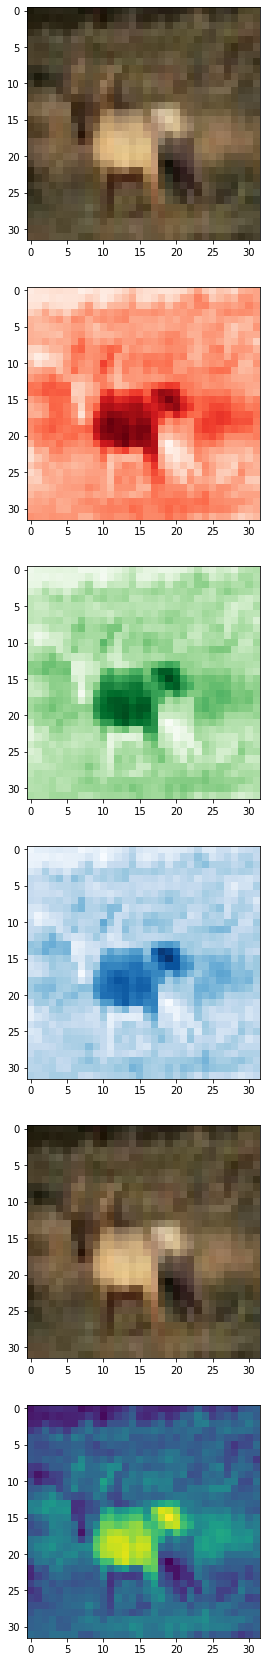

In [ ]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(x_train.shape)
print(x_train[0,].shape)
image = x_train[3,]

fig, ax = plt.subplots(6, figsize=(30,30))
ax[0].imshow(image)

image_r = image[:,:,0]
image_g = image[:,:,1]
image_b = image[:,:,2]
print(image_r.shape)

ax[1].imshow(image_r, cmap='Reds')
ax[2].imshow(image_g, cmap='Greens')
ax[3].imshow(image_b, cmap='Blues')

image_all = tf.stack([image_r, image_g, image_b], axis=2)
print(image_all.shape)
ax[4].imshow(image_all)

print('mean of channel r', tf.reduce_mean(image_r))
print('mean of channel g', tf.reduce_mean(image_g))
print('mean of channel b', tf.reduce_mean(image_b))

merged_image = tf.reduce_mean(image, axis=2)
print('mean of all channels', merged_image)
ax[5].imshow(merged_image)

# 2.7 linear algebra

In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/linalg
# Operations for linear algebra.


import tensorflow as tf
#1 norm
a = tf.constant([1, 2, 3], dtype=tf.float32)
print('a', a)
print('tf.norm(a)', tf.norm(a)) # tf.linalg.norm(a)

#2 transpose
A = tf.constant([[1, 2], [3, 4]], dtype=tf.float32)
print('A', A)
print('tf.linalg.matrix_transpose(A)', tf.linalg.matrix_transpose(A))

#3 determinant
print('tf.linalg.det(A)', tf.linalg.det(A))

#4 inverse matrix
B =  tf.linalg.inv(A) 
print('B', B)

#5 matrix multiplication
print('tf.matmul(A, B)', tf.matmul(A, B))  # tf.linalg.matmul(A, B)


matrix equation

Ax = b

==> x = A<sup>-1</sup> x b

A<sup>-1</sup> = $\frac{1}{DET(A)}$ A

In [ ]:

#1 Ax = b


A = tf.constant([[1, 4,  1],
                 [1, 6, -1],
                 [2, -1, 2]], dtype=tf.float32)

b = tf.constant([[ 7],
                 [13],
                 [ 5]], dtype=tf.float32)

#2 DET(A)
print(tf.linalg.det(A))

# x = A^-1 x b
x = tf.matmul(tf.linalg.inv(A), b)
print('x', x)

#3
def all_close(x, y, tol=1e-5):
         return tf.reduce_sum(tf.square(x - y)) < tol
print(all_close(tf.matmul(A, x), b))

#4
x = tf.linalg.solve(A, b)
print(x)
print(all_close(tf.matmul(A, x), b))


LU decomposition

A = LU 로 분해하여

Ax = b linear equations 을 푸는 과정에 활용해 보면,

=> LUx = b

=> Ux = Z  로 놓고

=> LZ = b  를 풀고

=> Ux = z 를 풀면

x 를 구할 수 있음 
(역행렬 방법과 비교하여 빠르고, 메모리 적게 사용해서 계산 가능)

In [ ]:

# A = tf.constant([[1,1,1],
#              [4,3,-1],
#              [3,5,3]], dtype=tf.float32)

# A = tf.constant([[3,-7,-2, 2],
#              [-3,5,1,0],
#              [6,-4,0,-5],
#              [-9,5,-5,12]], dtype=tf.float32)

A = tf.constant([[1, 4,  1],
                 [1, 6, -1],
                 [2, -1, 2]], dtype=tf.float32)

print('A', A)

# https://www.tensorflow.org/api_docs/python/tf/linalg/lu
# Computes the LU decomposition of one or more square matrices.

# The input is a tensor of shape [..., M, M] 
# whose inner-most 2 dimensions form square matrices.

# The input has to be invertible.

# The output consists of two tensors LU and P 
# containing the LU decomposition of all input submatrices [..., :, :]. 

# LU encodes the lower triangular and upper triangular factors.

lu, p = tf.linalg.lu(A)

print('tf.linalg.lu(A)', lu, p)

L = tf.linalg.band_part(lu,-1,0) - tf.linalg.diag(tf.linalg.diag_part(lu)) + tf.linalg.diag(tf.ones(shape = lu.shape[0],))
U = tf.linalg.band_part(lu, 0, -1)
permu_operator = tf.linalg.LinearOperatorPermutation(p)
P = permu_operator.to_dense()

print('L', L)
print('U', U)

AA = tf.matmul(P, tf.matmul(L,U), transpose_a = True)
print('AA', AA)

AAA = tf.linalg.lu_reconstruct(lu, p)
print('AAA', AAA)

#4: solve AX = b using PLUx = b
b = tf.constant([[ 7],
                 [13],
                 [ 5]], dtype=tf.float32)

tf.linalg.lu_solve(lu, p, b)

[1차 함수](https://www.geogebra.org/m/vu5eJ5K9)

y = ax + b


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

x = tf.linspace(-5,5,10)
y = 3*x+2
fig, ax = plt.subplots(figsize=(5,5))
ax.grid()
ax.plot(x, y, '-r')

(0, 6), (1, 0), (2, 0) 을 지나는 가장 가까운 직선의 방정식은?

6 = a x 0 + b

0 = a x 1 + b

0 = a x 2 + b

위 수식을 모두 만족하는 a 는 존재하는가? 

=> 존재하지 않으면 **차이가 최소(에러가 최소)**가 되는 근사값 $\hat{a}$ 을 구해보자!

Error<sup>2</sup> = (6 - (a x 0 + b))<sup>2</sup> + (0 - (a x 1 + b))<sup>2</sup> + (0 - (a x 2 + b))<sup>2</sup>

=> 2차 방정식이므로 $\hat{a}$ 과 $\hat{b}$ 에 대해 미분하자!

=> 행렬로 풀려면 공식 이용

$X = \begin{bmatrix}\hat{a}\\
\hat{b}
\end{bmatrix}$

(A<sup>T</sup>A)X = A<sup>T</sup>b

In [ ]:
A = tf.constant([[0, 1],
		 [1, 1],
		 [2, 1]], dtype=tf.float32)

b = tf.constant([[ 6],
                 [ 0],
                 [ 0]], dtype=tf.float32)

# Dividend ÷ Divisor = Quotient + Remainder

At = tf.transpose(A)
Dividend = tf.matmul(At, b)
Divisor = tf.matmul(At, A)
print('Dividend', Dividend)
print('Divisor', Divisor)
InvDivisor = tf.linalg.inv(Divisor)
print('Inverse of Divisor', InvDivisor)
X = tf.matmul(InvDivisor, Dividend)
print('X', X)
# a = X.numpy()[0]
# b = X.numpy()[1]
# print('a, b', a, b)
tf.linalg.solve(Divisor, Dividend)

# https://www.tensorflow.org/api_docs/python/tf/linalg/lstsq
# Solves one or more linear least-squares problems.
tf.linalg.lstsq(A, b)

In [ ]:
x = [0, 1, 2]
y = [6, 0, 0]
fig, ax = plt.subplots(figsize=(5,5))
ax.grid()
plt.xlim([-10, 10])
plt.ylim([-10, 10])
ax.scatter(x, y)
xx = tf.linspace(-10, 10, 10)
yy = -3 * xx + 5   # -3과 5는 어떻게 알 수 있었나?
ax.plot(xx, yy, '--g')

# 2.8 gradient decent


Error = (y-$\hat{y}$)<sup>2</sup>

Mean Squared Error

$$\frac{1}{n}\sum_{i=1}^{n}(y-\hat{y})^2$$


예) $x^2 -2x + 1$

[2차 함수](https://www.geogebra.org/m/xgdQkfk3)


x <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=4.0>


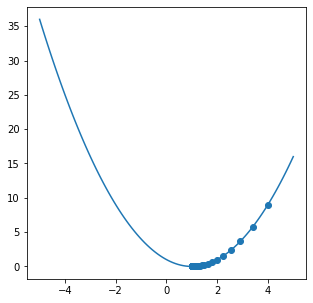

In [ ]:
def f(x):
  return x**2 - 2*x + 1

def f_prime(x):
  h = 0.01
  return (f(x+h)-f(x)) / h

def f_prime2(x):
  return 2*x + 2

all_x = tf.linspace(-5,5,100)
all_y = f(all_x)

x = tf.Variable(4.) # initial value
LR = 0.1
print('x', x)
x_history, y_history = [], []
for _ in range(100):
  y = f(x)
  step1 = LR*f_prime(x)
  step2 = LR*f_prime2(x)
  x_history.append(x.numpy())
  y_history.append(y.numpy())

  x.assign_sub(step1)

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(all_x, all_y)
ax.scatter(x_history, y_history)
